# Topic Modeling

In [1]:
from pathlib import Path
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic
from top2vec import Top2Vec
from data import data_helpers
from data import nlp

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jessicahassibi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Method 1: Top2Vec

In [2]:
multilingual_documents = data_helpers.get_documents_list()

Recommended for multilingual datasets: 'distiluse-base-multilingual-cased' (pre-trained sentence transformer)
- no specified will use doc2vec method -> not multilingual

Top2Vec: no need to remove stop words

In [4]:
multilingual_documents[101]

'Ignatz Waghalter (* 15. März 1881 in Warschau; † 7. April 1949 in New York City) war ein polnisch-deutscher Komponist und Dirigent.'

### Parameter:
- ngram_vocab: True allows bigrams (no trigrams etc.!)
- min_count: ignore words with smaller total count
- verbose: True to print status duri training

In [5]:
top2vec_model = Top2Vec(multilingual_documents, verbose=True, min_count=10, ngram_vocab=True, embedding_model='distiluse-base-multilingual-cased')
topic_models_path: Path = Path(data_helpers.get_topic_modeling_path())

2022-09-12 12:16:38,542 - top2vec - INFO - Pre-processing documents for training
2022-09-12 12:16:38,754 - top2vec - INFO - Downloading distiluse-base-multilingual-cased model
2022-09-12 12:16:41,070 - top2vec - INFO - Creating joint document/word embedding
2022-09-12 12:18:55,924 - top2vec - INFO - Creating lower dimension embedding of documents
2022-09-12 12:19:00,271 - top2vec - INFO - Finding dense areas of documents
2022-09-12 12:19:00,292 - top2vec - INFO - Finding topics


In [12]:
top2vec_model.save(topic_models_path.joinpath("Top2Vec_multilingual"))

In [8]:
top2vec_model = Top2Vec.load(topic_models_path.joinpath("/Top2Vec_multilingual"))

NameError: name 'topic_models_path' is not defined

In [13]:
top2vec_model.get_num_topics()

2

In [14]:
words, word_scores = top2vec_model.similar_words(keywords=["Schoenberg"], keywords_neg=[], num_words=20) 
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

schonberg 0.8789182910434017
fitelberg 0.8575633623396246
grzegorz fitelberg 0.7697791900455137
salzburg 0.7282399173498251
arnold schoenberg 0.7222844299833705
fritz 0.6767010522055235
leibowitz 0.6628771785799432
schnabel 0.6520129746211508
arnold schonberg 0.6501298757311247
werner 0.6479105965186455
siegfried 0.640864365589467
wiener 0.6400138172819045
bernhard 0.6383572168306233
stravinsky 0.631416182699011
eisler 0.6229397389739414
jessel 0.6168720388155726
willner 0.6135416917204782
munich 0.6071191673443367
erwin schulhoff 0.6047602687726652
schlesinger 0.6025715396759643


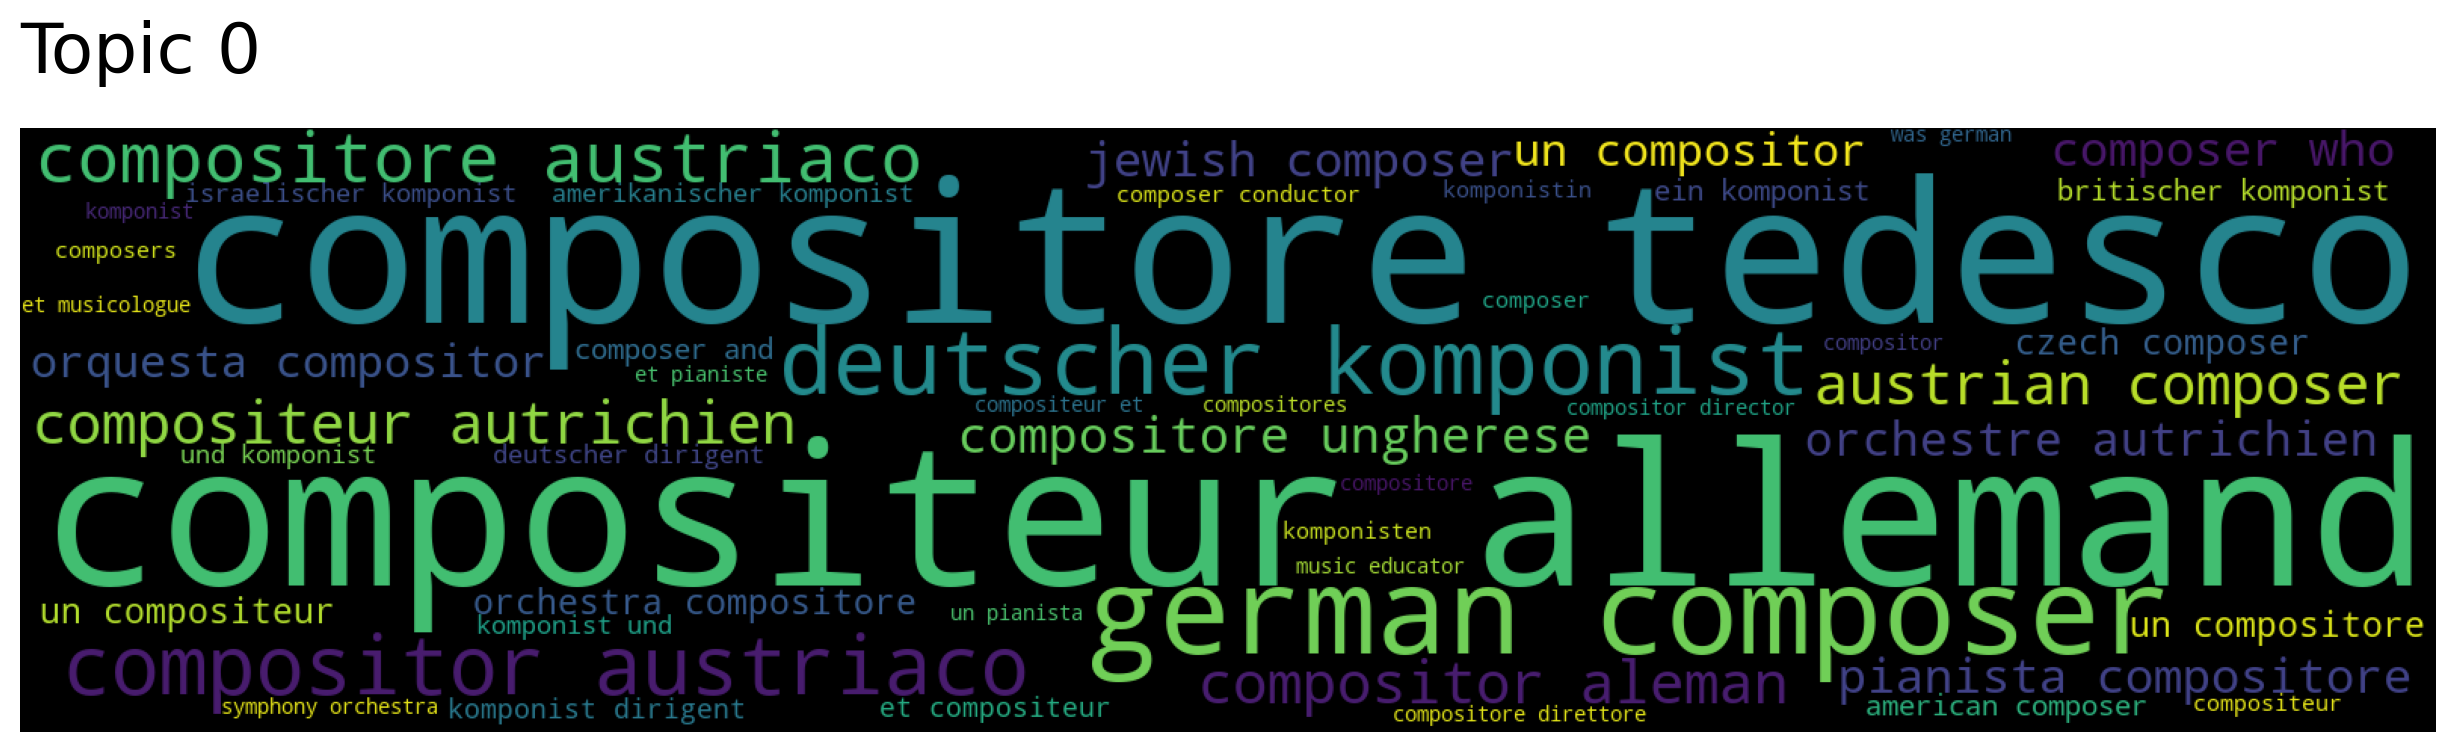

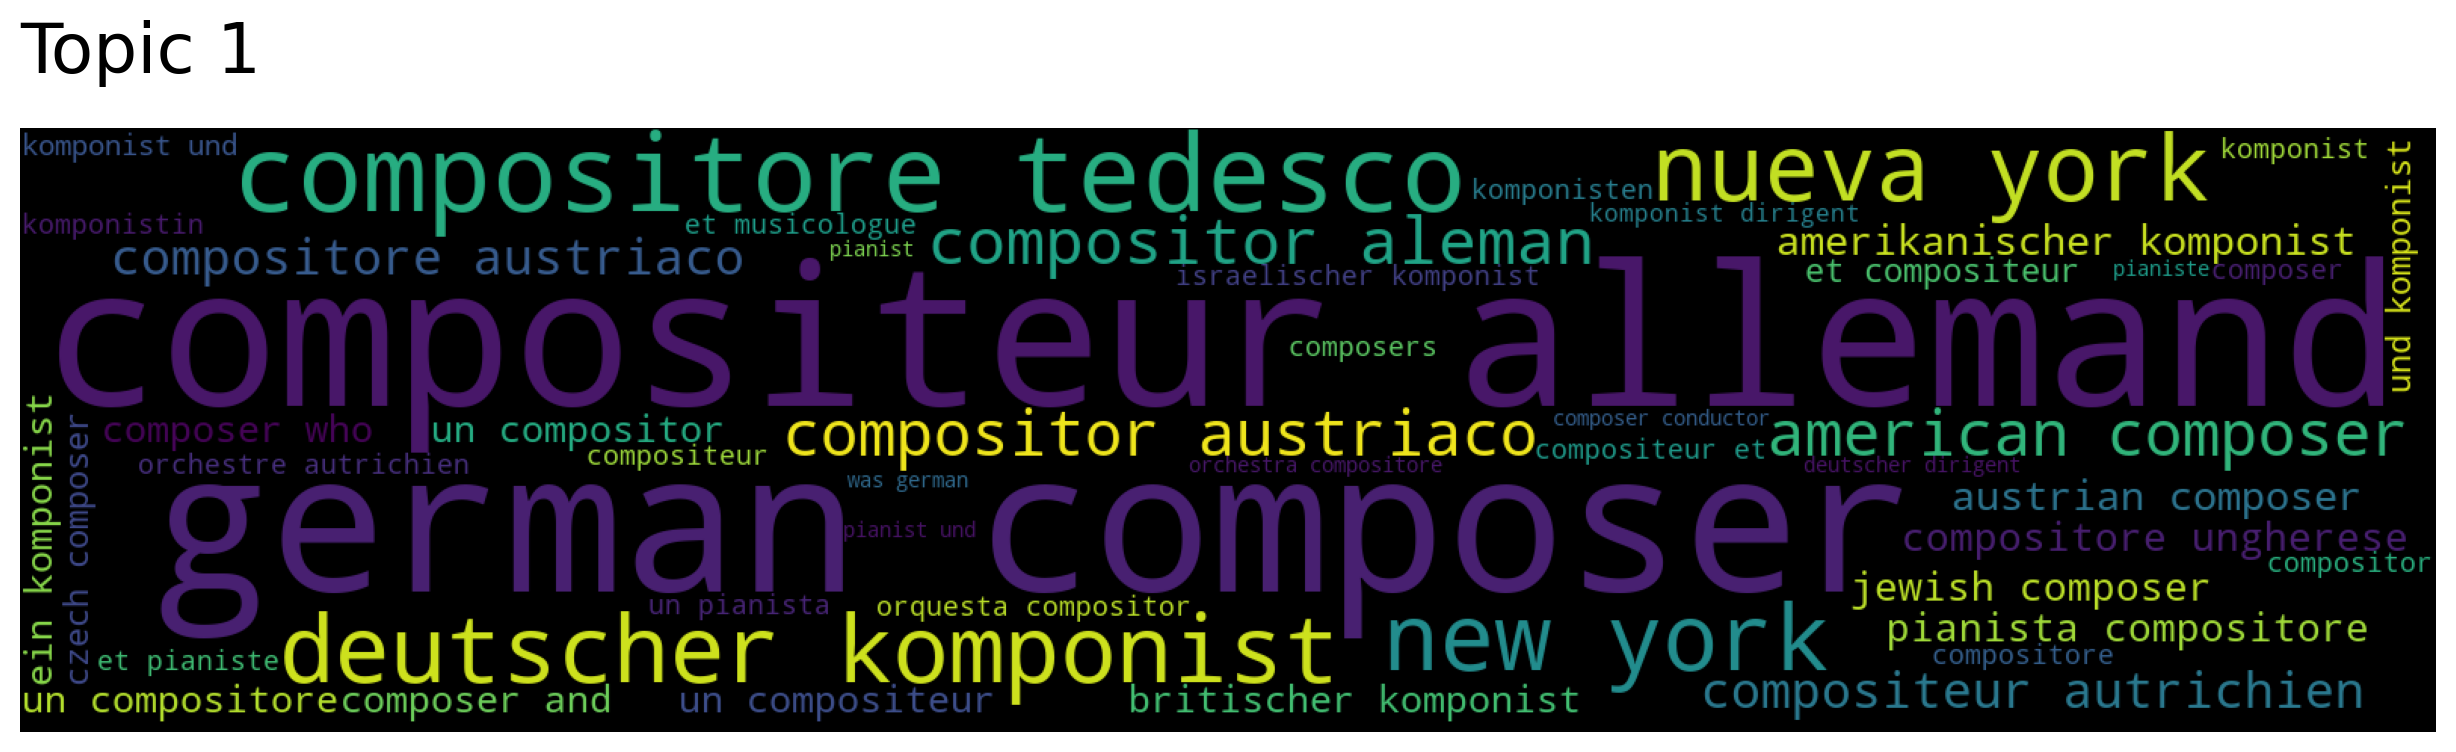

In [15]:
for topic in range(top2vec_model.get_num_topics()):
    top2vec_model.generate_topic_wordcloud(topic)

## Method 2: BERTopic

In [3]:
# Train model on documents with mixed languages

# merge stopwords for each language
stop_words = nlp.get_stop_words()

In [5]:
# language="multilingual" results in using sentence-transformers model "paraphrase-multilingual-MiniLM-L12-v2"
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stop_words)
topic_model = BERTopic(verbose=True, language="multilingual", vectorizer_model=vectorizer_model) # use min_topic_size=40 for less topics
topics, probs = topic_model.fit_transform(multilingual_documents)

Batches:   0%|          | 0/26 [00:00<?, ?it/s]

2022-09-12 12:32:43,357 - BERTopic - Transformed documents to Embeddings
2022-09-12 12:32:47,722 - BERTopic - Reduced dimensionality
2022-09-12 12:32:47,754 - BERTopic - Clustered reduced embeddings


In [4]:
topic_model.save(topic_models_path.joinpath("BERTopic_multilingual"))

# Update topic representations to try different parameters
#topic_model.update_topics(multilingual_documents, topics, vectorizer_model=cv)

SyntaxError: unexpected EOF while parsing (671122091.py, line 4)

In [15]:
topic_model = BERTopic.load(topic_models_path.joinpath("BERTopic_multilingual"))

In [6]:
topic_model.get_topic_info()

Topic  Count                                     Name
0      -1    301  -1_komponist_composer_music_compositeur
1       0     62               0_koppel_29_kreisler_kaper
2       1     49       1_schoenberg_schulhoff_schnabel_21
3       2     49     2_szell_cleveland_szpilman_fitelberg
4       3     33               3_dauber_hollaender_18_dol
5       4     31                  4_ben_haim_ben haim_tel
6       5     30              5_zipper_ramin_berlin_trapp
7       6     29              6_leibowitz_karel_reiner_17
8       7     26                   7_antal_doráti_egon_13
9       8     25             8_weiner_weinberg_weill_kurt
10      9     25             9_22_deutsch_max deutsch_max
11     10     22                 10_eisler_egk_hanns_orff
12     11     18           11_tansman_van_van gilse_gilse
13     12     18  12_steuermann_buenos aires_buenos_aires
14     13     18             13_gál_bresgen_hans gál_1890
15     14     16              14_angeles_waxman_pisk_film
16     15     16     15_auschwitz_1944_winterberg_ullmann
17     16     14      16_19_walter braunfels_braunfels_17
18     17     12          17_strauss_richard_11_conductor
19     18     10              18_wien_1970_komponist_1893

In [7]:
topic_model.visualize_topics()

In [8]:
topic_model.transform("Schönberg")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2022-09-12 12:34:50,939 - BERTopic - Reduced dimensionality
2022-09-12 12:34:50,941 - BERTopic - Predicted clusters


([1], array([0.80113599]))

In [9]:
for i in range(len(topic_model.get_topic_info())):
    print(f"Thema {i-1}")
    list = topic_model.get_topic(i-1)
    for elem in list:
        print(elem)
    print()

Thema -1
('komponist', 0.010587479512024732)
('composer', 0.009830652072734238)
('music', 0.008687032941313776)
('compositeur', 0.00794588034135193)
('né', 0.007512115655370012)
('german', 0.007241897374380056)
('deutscher', 0.0066281421182791045)
('pianist', 0.006582374991547337)
('mort', 0.006532725885765651)
('1945', 0.006156874803268437)

Thema 0
('koppel', 0.01945769306680083)
('29', 0.018370441765044133)
('kreisler', 0.01430282692070186)
('kaper', 0.013395505142429454)
('krása', 0.0115292530644955)
('korngold', 0.011337719701594811)
('november', 0.010624807347459679)
('hans krása', 0.010566947762366692)
('paul', 0.010475804389492645)
('hollywood', 0.01024089108778991)

Thema 1
('schoenberg', 0.013242120923081415)
('schulhoff', 0.013020625357967022)
('schnabel', 0.012804316101163442)
('21', 0.012728578229638268)
('13', 0.011796434600491701)
('1951', 0.011339170928446652)
('arnold', 0.010937049223176397)
('berlin', 0.010743201233443014)
('schreker', 0.010085524937570433)
('schönber